# CA05-A – Logistic Regression 

##1.  The Application

 Cardiovascular Disease (CVD) kills more people than cancer globally. A dataset of real heart patients collected from a 15 year heart study cohort is made available for this assignment. The dataset has 16 patient features. Note that none of the features include any Blood Test information

In [0]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib as plt

In [0]:
data=pd.read_csv('https://github.com/ArinB/CA05-B-Logistic-Regression/raw/master/cvd_data.csv')

In [4]:
print(data.shape)
data.head()
#Dataset has 17 columns and 3242 rows

(3242, 17)


,cvd_4types,age_s1,race,educat,mstat,hip,neck20,waist,av_weight_kg,cgpkyr,tea15,srhype,parrptdiab,bend25,happy25,tired25,hlthlm25
0,0,54,1,2,1,110.0,40.0,108.0,87.5,34.0,0,1,0,1,2,3,4
1,0,56,3,2,1,113.0,34.0,107.0,83.5,0.0,0,0,0,2,2,1,3
2,0,54,1,3,1,110.0,44.5,105.0,86.2,49.5,0,0,0,3,2,6,4
3,0,54,1,3,1,129.0,42.5,110.0,89.1,0.0,0,0,0,3,2,1,3
4,0,51,3,2,1,122.0,37.0,113.0,81.3,0.0,0,0,0,2,1,1,2


## Data exploration

Counting null values and seeing the proportion of output variable

1    1913
0    1329
Name: cvd_4types, dtype: int64


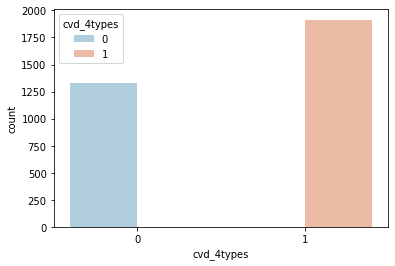

In [5]:

print(data['cvd_4types'].value_counts())

sns.countplot(x='cvd_4types',hue='cvd_4types',data=data,palette='RdBu_r') # The ones with cardiovascular disease are in red and the ones dont are in blue

In [6]:
#Collinearity
 
data.corr(method ='pearson') 
# variables which have high correlation can be taken out
#hip #waist #av_weight_kg

,cvd_4types,age_s1,race,educat,mstat,hip,neck20,waist,av_weight_kg,cgpkyr,tea15,srhype,parrptdiab,bend25,happy25,tired25,hlthlm25
cvd_4types,1.000000,0.089168,-0.143843,0.053662,-0.076659,0.018482,0.101653,0.203104,0.058616,0.037151,-0.028436,0.071819,0.074406,-0.009653,-0.033048,0.022130,-0.126168
age_s1,0.089168,1.000000,0.000626,-0.207595,0.013170,-0.121743,-0.001135,0.086363,0.073152,0.072336,-0.007279,0.268032,0.140819,-0.224303,-0.044323,0.012448,-0.164790
race,-0.143843,0.000626,1.000000,-0.061934,0.058878,0.030535,-0.010810,0.012960,0.045118,-0.040240,-0.005746,0.053822,0.079818,-0.064647,0.005103,-0.014226,-0.117117
educat,0.053662,-0.207595,-0.061934,1.000000,0.026047,-0.008162,0.000856,-0.057212,-0.052692,-0.047632,0.022097,-0.110072,-0.117066,0.166887,-0.093659,0.079794,0.096398
mstat,-0.076659,0.013170,0.058878,0.026047,1.000000,0.012425,-0.078962,-0.044175,-0.046429,-0.006983,0.012250,-0.002689,0.012210,-0.016304,0.033619,-0.031645,-0.055162
hip,0.018482,-0.121743,0.030535,-0.008162,0.012425,1.000000,0.321828,0.710743,0.428565,-0.006662,0.003894,0.121578,0.085835,-0.229975,0.029561,-0.131190,-0.096214
neck20,0.101653,-0.001135,-0.010810,0.000856,-0.078962,0.321828,1.000000,0.617500,0.525890,0.190235,0.022729,0.105139,0.118303,-0.091327,0.008170,0.002945,-0.010144
waist,0.203104,0.086363,0.012960,-0.057212,-0.044175,0.710743,0.617500,1.000000,0.641330,0.112615,0.014916,0.201122,0.134582,-0.246275,0.020475,-0.091524,-0.111527
av_weight_kg,0.058616,0.073152,0.045118,-0.052692,-0.046429,0.428565,0.525890,0.641330,1.000000,0.111671,0.013763,0.196695,0.094746,-0.155036,0.028020,-0.054466,-0.015056
cgpkyr,0.037151,0.072336,-0.040240,-0.047632,-0.006983,-0.006662,0.190235,0.112615,0.111671,1.000000,0.000500,0.013163,0.044049,-0.056544,0.026469,-0.051990,-0.030523


In [0]:
data=data.drop(['hip'], axis=1) # drop hip as it is highly correlated to waist


Create dummy variables

In [8]:
data = pd.get_dummies(data, columns=['race', 'educat', 'mstat', 'srhype', 'parrptdiab', 'parrptdiab', 'happy25','tired25','hlthlm25'],drop_first=True)
data.head()


,cvd_4types,age_s1,neck20,waist,av_weight_kg,cgpkyr,tea15,bend25,race_2,race_3,educat_2,educat_3,educat_4,mstat_2,mstat_3,mstat_4,mstat_8,srhype_1,parrptdiab_1,parrptdiab_1,happy25_2,happy25_3,happy25_4,happy25_5,happy25_6,tired25_2,tired25_3,tired25_4,tired25_5,tired25_6,hlthlm25_2,hlthlm25_3,hlthlm25_4,hlthlm25_5
0,0,54,40.0,108.0,87.5,34.0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
1,0,56,34.0,107.0,83.5,0.0,0,2,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,54,44.5,105.0,86.2,49.5,0,3,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
3,0,54,42.5,110.0,89.1,0.0,0,3,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,51,37.0,113.0,81.3,0.0,0,2,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [9]:
data.shape #from 17 columns now we have 34 columns including all dummy variables

(3242, 34)

Test Train split the model

In [0]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('cvd_4types',axis=1),data['cvd_4types'],
                                                    test_size=0.30, random_state=101)


Running the model

In [11]:
#Fit , Train the logistic regression classifier
from sklearn import linear_model 
clf=linear_model.LogisticRegression(C=1e40,solver='newton-cg')
fitted_model=clf.fit(X_train,y_train)

#predict
y_pred=clf.predict(X_test)

fitted_model.score(X_test,y_test)

#the model has acccuracy of 0.70 which eans it is 70% accurate


0.7009249743062693

##Finding the best model 

Using RandomizedSearchCV() module, we will find the best model by changing the hyperparameters

In [13]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# Create logistic regression
logistic = linear_model.LogisticRegression()

# Create regularization penalty space - it is a hyperparameter
penalty = ['l1', 'l2']

# Create regularization hyperparameter distribution using uniform distribution
C = uniform(loc=0, scale=4)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

# Create randomized search 5-fold cross validation and 100 iterations
clf = RandomizedSearchCV(logistic, hyperparameters, random_state=1, n_iter=100, cv=5, verbose=0, n_jobs=-1)

# Fit randomized search
best_model = clf.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [14]:
# View best hyperparameters
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

Best Penalty: l2
Best C: 0.7450408455106836


In [15]:
# Predict target variable 
best_model.predict(X_test)
#print best model score
best_model.score(X_test,y_test)


#0.70 is the best score as we achived above as well


0.7009249743062693

##Part 2: Display the Feature Importance of all the features sorted in the order of decreasing influence on the CVD Risk (deliverable: Notebook) 



In [16]:
#Ranking the variables
fitted_model.fit(X_train/np.std(X_train,0),y_train)
print(fitted_model.coef_)
#decreasing order of importance of factors on CVD risk

[[ 7.45244706e-02 -8.01505637e-02  5.21280642e-01 -9.60003239e-02
   5.77593714e-02 -4.42775934e-02 -8.25419866e-03 -1.29685805e-01
  -3.80028251e-01 -1.54270019e-01 -8.14552397e-02  2.94370680e-01
  -1.66758585e-01 -1.05306133e-01 -3.84175980e-01  1.86614009e-01
   2.91422712e-02  8.64283493e-02  8.64283493e-02  1.02240428e-01
  -9.29440610e-03 -2.09573264e-04 -3.54761552e-03  5.25301082e-03
   6.59130245e-02  7.61292129e-02  2.13790912e-01  2.77964479e-01
   1.33341482e-01  3.57819602e-03 -4.60674825e-02 -2.76322431e-02
  -6.34425498e-01]]


In [20]:
features=np.std(X_train,0)*fitted_model.coef_[0]

features.sort_values(ascending=False)

waist           7.140247
cgpkyr          1.169841
age_s1          0.770909
tired25_5       0.135355
tired25_4       0.103766
educat_4        0.064570
happy25_2       0.050275
tired25_6       0.035667
tired25_3       0.022250
parrptdiab_1    0.021475
parrptdiab_1    0.021475
mstat_8         0.017443
tired25_2       0.013910
srhype_1        0.013690
hlthlm25_2      0.000482
happy25_6       0.000479
happy25_4      -0.000061
happy25_5      -0.000478
happy25_3      -0.003218
bend25         -0.005551
hlthlm25_4     -0.012441
hlthlm25_3     -0.017111
mstat_3        -0.026804
race_2         -0.028329
educat_3       -0.038186
mstat_2        -0.047490
race_3         -0.050011
tea15          -0.054917
mstat_4        -0.057488
educat_2       -0.076895
hlthlm25_5     -0.184642
neck20         -0.327180
av_weight_kg   -0.741227
dtype: float64

##Part 3: Evaluate the performance of your model (including ROC Curve), explain the performance and draw a meaningful conclusion. (deliverable: Performance outputs in Notebook, explanation and conclusion in Word/PDF document) 

              precision    recall  f1-score   support

           0       0.74      0.46      0.57       415
           1       0.69      0.88      0.77       558

    accuracy                           0.70       973
   macro avg       0.71      0.67      0.67       973
weighted avg       0.71      0.70      0.68       973

ROC AUC score is   0.670084639633804
None


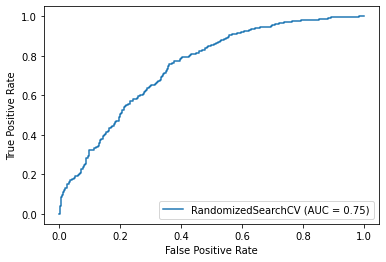

In [17]:
#printing a classification report of the model created
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,y_pred))


#ROC curve 

from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_curve, auc
plot_roc_curve(clf, X_test, y_test)

test_auc = print("ROC AUC score is  ",roc_auc_score(y_test, y_pred))
print(test_auc)